# Objective

Determine the good measurement for flow cell "dirtiness" (i.e., how badly the background is contaminated by those small bright specks that build up).

# Contents

This notebook shows each image and six different possible metrics for the dirtiness of that image. The six metrics shown here are the following:
- `image_name`: summing the image without filtering
- `sum_filtered1`: summing the image with a bandpass filter to enhance the speckles
- `sum_filtered2`: summing the image with two bandpass filters to remove the "ghosts"
- `sum_filtered2`: summing the binarized image without filtering
- `sum_filtered2`: summing the binarized image with a bandpass filter to enhance the speckles
- `sum_bin_filtered2`: summing the binarized image with two bandpass filters to remove the "ghosts"

At the bottom of the notebook is a plot for each metric with the image name on the vertical axis ticks.

# Results

There’s definite a clearer pattern of dirtiness is definitely increasing from lane 1 to lane 7 as expected in the last two plots, which are the ones for (1) summing the hot areas of an image that was binarized after application of a bandpass filter and (2) summing the hot areas of an image that was binarized after application of the first bandpass filter and also another one to remove the "ghosts.” So those two metrics are possibilities for measuring the dirtiness of the flow cells.

In [1]:
from skimage.io import imread, imsave
from skimage.util import img_as_float
from skimage.filters import difference_of_gaussians, threshold_otsu
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)
    return img[starty:starty+cropy,startx:startx+cropx]

In [3]:
cropx, cropy = 1448, 1448
sig_min = 1
sig_max1 = 12
sig_max2 = 3

base_dir = '2022-04-27_GB20106_backgrounds'
data_dir = '2022-03-25 GB20106 flow cell background sample images'
cols = ['image_name',
        'run_no',
        'lane_no',
        'binarization_threshold',
        'sum_bin_filtered2']

In [4]:
run_dirs = sorted(os.listdir(base_dir))
if '.DS_Store' in run_dirs:
    run_dirs.remove('.DS_Store')

In [12]:
for i in range(len(run_dirs)):
    run_dir = run_dirs[i]
    
    print(run_dir, '\t%d/%d' % (i, len(run_dirs)))
    df = pd.DataFrame(columns=cols)
    data_dir = '%s/%s' % (base_dir, run_dir)
    image_names = sorted(os.listdir(data_dir))
    for image_name in image_names:
        if image_name[-6]!='-':
            continue        

        path = '%s/%s' % (data_dir, image_name)
        image = imread(path)

        image_cropped = crop_center(image,cropx,cropy)
        filtered1_image = difference_of_gaussians(image_cropped, sig_min, sig_max1)
        filtered2_image = difference_of_gaussians(filtered1_image, sig_min, sig_max2)
        binarization_threshold = threshold_otsu(filtered2_image)
        filtered2_binary = filtered2_image > binarization_threshold
        
        image_cropped_path = '%s/%s_cropped.jpg' % (data_dir, image_name[:-4])
        imsave(image_cropped_path, image_cropped)
        image_processed_path = '%s/%s_processed.jpg' % (data_dir, image_name[:-4])
        imsave(image_processed_path, filtered2_binary)

        sum_bin_filtered2 = np.sum(filtered2_binary)
        row = {'image_name': image_name,
               'run_no': run_dir,
               'lane_no': int(image_name[-5]),
               'binarization_threshold': binarization_threshold,
               'sum_bin_filtered2': sum_bin_filtered2}        
        print('\t%s\tdirtiness = %d' % (image_name, sum_bin_filtered2))
        df = df.append(row, ignore_index=True)
        
    df.to_csv('%s/dirtiness.csv' % data_dir)

20220106-104444 	0/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220106-104444-0.tif	dirtiness = 224


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220106-104444-1.tif	dirtiness = 1039


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220106-104444-2.tif	dirtiness = 413


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220106-104444-3.tif	dirtiness = 1874


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220106-104444-4.tif	dirtiness = 1332


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220106-104444-5.tif	dirtiness = 5650


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220106-104444-6.tif	dirtiness = 3448


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220106-104444-7.tif	dirtiness = 255
20220107-111707 	1/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-111707-0.tif	dirtiness = 328


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-111707-1.tif	dirtiness = 1196


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-111707-2.tif	dirtiness = 294


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-111707-3.tif	dirtiness = 1646


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-111707-4.tif	dirtiness = 1282


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-111707-5.tif	dirtiness = 3215


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-111707-6.tif	dirtiness = 2140


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-111707-7.tif	dirtiness = 279
20220107-141754 	2/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-141754-0.tif	dirtiness = 416


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-141754-1.tif	dirtiness = 1053


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-141754-2.tif	dirtiness = 322


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-141754-3.tif	dirtiness = 1453


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-141754-4.tif	dirtiness = 1342


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-141754-5.tif	dirtiness = 4201


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-141754-6.tif	dirtiness = 1565


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220107-141754-7.tif	dirtiness = 249
20220110-160013 	3/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220110-160013-0.tif	dirtiness = 514


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220110-160013-1.tif	dirtiness = 1375


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220110-160013-2.tif	dirtiness = 429


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220110-160013-3.tif	dirtiness = 1098


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220110-160013-4.tif	dirtiness = 1166


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220110-160013-5.tif	dirtiness = 3361


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220110-160013-6.tif	dirtiness = 1453


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220110-160013-7.tif	dirtiness = 136
20220112-105942 	4/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-105942-0.tif	dirtiness = 512


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-105942-1.tif	dirtiness = 1107


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-105942-2.tif	dirtiness = 1325


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-105942-3.tif	dirtiness = 1138


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-105942-4.tif	dirtiness = 1194


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-105942-5.tif	dirtiness = 3401


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-105942-6.tif	dirtiness = 2759


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-105942-7.tif	dirtiness = 235
20220112-132037 	5/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-132037-0.tif	dirtiness = 1346


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-132037-1.tif	dirtiness = 2448


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-132037-2.tif	dirtiness = 764


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-132037-3.tif	dirtiness = 3138


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-132037-4.tif	dirtiness = 7964


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-132037-5.tif	dirtiness = 6224


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-132037-6.tif	dirtiness = 396


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-132037-7.tif	dirtiness = 2409
20220112-143742 	6/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-143742-0.tif	dirtiness = 467


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-143742-1.tif	dirtiness = 2191


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-143742-2.tif	dirtiness = 470


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-143742-3.tif	dirtiness = 2102


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-143742-4.tif	dirtiness = 2778


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-143742-5.tif	dirtiness = 5543


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-143742-6.tif	dirtiness = 3584


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-143742-7.tif	dirtiness = 1147
20220112-161238 	7/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-161238-0.tif	dirtiness = 500


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-161238-1.tif	dirtiness = 1986


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-161238-2.tif	dirtiness = 332


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-161238-3.tif	dirtiness = 3062


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-161238-4.tif	dirtiness = 2895


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-161238-5.tif	dirtiness = 4945


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-161238-6.tif	dirtiness = 4666


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220112-161238-7.tif	dirtiness = 824
20220113-143848 	8/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220113-143848-0.tif	dirtiness = 870


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220113-143848-1.tif	dirtiness = 2173


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220113-143848-2.tif	dirtiness = 608


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220113-143848-3.tif	dirtiness = 1829


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220113-143848-4.tif	dirtiness = 3490


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220113-143848-5.tif	dirtiness = 5655


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220113-143848-6.tif	dirtiness = 2554


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220113-143848-7.tif	dirtiness = 562
20220114-143015 	9/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-143015-0.tif	dirtiness = 418


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-143015-1.tif	dirtiness = 2418


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-143015-2.tif	dirtiness = 933


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-143015-3.tif	dirtiness = 2240


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-143015-4.tif	dirtiness = 5413


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-143015-5.tif	dirtiness = 4962


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-143015-6.tif	dirtiness = 28179


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-143015-7.tif	dirtiness = 1720
20220114-162658 	10/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-162658-0.tif	dirtiness = 514


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-162658-1.tif	dirtiness = 1964


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-162658-2.tif	dirtiness = 1908


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-162658-3.tif	dirtiness = 2477


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-162658-4.tif	dirtiness = 4211


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-162658-5.tif	dirtiness = 7106


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-162658-6.tif	dirtiness = 89453


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220114-162658-7.tif	dirtiness = 1605
20220121-103409 	11/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-103409-0.tif	dirtiness = 1109


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-103409-1.tif	dirtiness = 2543


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-103409-2.tif	dirtiness = 760


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-103409-3.tif	dirtiness = 4083


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-103409-4.tif	dirtiness = 1861


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-103409-5.tif	dirtiness = 8529


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-103409-6.tif	dirtiness = 5135


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-103409-7.tif	dirtiness = 1797
20220121-125117 	12/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-125117-0.tif	dirtiness = 2837


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-125117-1.tif	dirtiness = 3025


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-125117-2.tif	dirtiness = 928


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-125117-3.tif	dirtiness = 1944


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-125117-4.tif	dirtiness = 3902


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-125117-5.tif	dirtiness = 15032


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-125117-6.tif	dirtiness = 6160


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220121-125117-7.tif	dirtiness = 4357
20220124-122801 	13/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220124-122801-0.tif	dirtiness = 896


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220124-122801-1.tif	dirtiness = 2684


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220124-122801-2.tif	dirtiness = 2796


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220124-122801-3.tif	dirtiness = 2305


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220124-122801-4.tif	dirtiness = 4191


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220124-122801-5.tif	dirtiness = 18561


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220124-122801-6.tif	dirtiness = 4396


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220124-122801-7.tif	dirtiness = 5561
20220125-103433 	14/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-103433-0.tif	dirtiness = 1608


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-103433-1.tif	dirtiness = 3797


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-103433-2.tif	dirtiness = 1265


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-103433-3.tif	dirtiness = 2288


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-103433-4.tif	dirtiness = 10554


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-103433-5.tif	dirtiness = 26393


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-103433-6.tif	dirtiness = 5259


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-103433-7.tif	dirtiness = 5102
20220125-123653 	15/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-123653-0.tif	dirtiness = 2891


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-123653-1.tif	dirtiness = 3699


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-123653-2.tif	dirtiness = 1255


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-123653-3.tif	dirtiness = 2114


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-123653-4.tif	dirtiness = 6588


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-123653-5.tif	dirtiness = 22803


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-123653-6.tif	dirtiness = 4108


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220125-123653-7.tif	dirtiness = 4233
20220126-185112 	16/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-185112-0.tif	dirtiness = 1653


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-185112-1.tif	dirtiness = 3550


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-185112-2.tif	dirtiness = 1324


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-185112-3.tif	dirtiness = 2619


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-185112-4.tif	dirtiness = 6295


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-185112-5.tif	dirtiness = 17427


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-185112-6.tif	dirtiness = 4224


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-185112-7.tif	dirtiness = 8167
20220126-201638 	17/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-201638-0.tif	dirtiness = 1989


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-201638-1.tif	dirtiness = 3590


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-201638-2.tif	dirtiness = 1804


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-201638-3.tif	dirtiness = 2677


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-201638-4.tif	dirtiness = 4549


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-201638-5.tif	dirtiness = 12529


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-201638-6.tif	dirtiness = 3979


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220126-201638-7.tif	dirtiness = 7675
20220127-112521 	18/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-112521-0.tif	dirtiness = 2141


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-112521-1.tif	dirtiness = 4271


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-112521-2.tif	dirtiness = 2389


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-112521-3.tif	dirtiness = 3103


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-112521-4.tif	dirtiness = 6990


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-112521-5.tif	dirtiness = 9586


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-112521-6.tif	dirtiness = 5697


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-112521-7.tif	dirtiness = 8913
20220127-141305 	19/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-141305-0.tif	dirtiness = 4308


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-141305-1.tif	dirtiness = 4136


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-141305-2.tif	dirtiness = 2062


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-141305-3.tif	dirtiness = 3262


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-141305-4.tif	dirtiness = 8689


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-141305-5.tif	dirtiness = 14348


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-141305-6.tif	dirtiness = 6124


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220127-141305-7.tif	dirtiness = 82472
20220128-211350 	20/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-211350-0.tif	dirtiness = 1047


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-211350-1.tif	dirtiness = 4727


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-211350-2.tif	dirtiness = 2321


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-211350-3.tif	dirtiness = 3664


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-211350-4.tif	dirtiness = 7858


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-211350-5.tif	dirtiness = 14208


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-211350-6.tif	dirtiness = 6070


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-211350-7.tif	dirtiness = 6913
20220128-225343 	21/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-225343-0.tif	dirtiness = 3074


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-225343-1.tif	dirtiness = 4974


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-225343-2.tif	dirtiness = 2306


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-225343-3.tif	dirtiness = 3391


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-225343-4.tif	dirtiness = 8435


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-225343-5.tif	dirtiness = 12428


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-225343-6.tif	dirtiness = 6624


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220128-225343-7.tif	dirtiness = 7292
20220131-124203 	22/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220131-124203-0.tif	dirtiness = 1072


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220131-124203-1.tif	dirtiness = 5762


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220131-124203-2.tif	dirtiness = 1867


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220131-124203-3.tif	dirtiness = 3138


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220131-124203-4.tif	dirtiness = 7346


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220131-124203-5.tif	dirtiness = 11821


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220131-124203-6.tif	dirtiness = 7202


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220131-124203-7.tif	dirtiness = 8995
20220201-103935 	23/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-103935-0.tif	dirtiness = 1756


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-103935-1.tif	dirtiness = 4323


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-103935-2.tif	dirtiness = 1449


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-103935-3.tif	dirtiness = 3219


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-103935-4.tif	dirtiness = 8487


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-103935-5.tif	dirtiness = 9363


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-103935-6.tif	dirtiness = 5774


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-103935-7.tif	dirtiness = 11928
20220201-132357 	24/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-132357-0.tif	dirtiness = 1246


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-132357-1.tif	dirtiness = 3857


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-132357-2.tif	dirtiness = 1721


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-132357-3.tif	dirtiness = 3058


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-132357-4.tif	dirtiness = 9311


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-132357-5.tif	dirtiness = 11644


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-132357-6.tif	dirtiness = 5246


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220201-132357-7.tif	dirtiness = 10327
20220202-143457 	25/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220202-143457-0.tif	dirtiness = 19766


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220202-143457-1.tif	dirtiness = 5681


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220202-143457-2.tif	dirtiness = 1950


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220202-143457-3.tif	dirtiness = 3953


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220202-143457-4.tif	dirtiness = 11614


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220202-143457-5.tif	dirtiness = 7930


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220202-143457-6.tif	dirtiness = 7066


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220202-143457-7.tif	dirtiness = 10068
20220203-140608 	26/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-140608-0.tif	dirtiness = 1012


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-140608-1.tif	dirtiness = 3747


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-140608-2.tif	dirtiness = 1835


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-140608-3.tif	dirtiness = 3511


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-140608-4.tif	dirtiness = 13752


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-140608-5.tif	dirtiness = 8225


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-140608-6.tif	dirtiness = 6257


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-140608-7.tif	dirtiness = 13390
20220203-175710 	27/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-175710-0.tif	dirtiness = 1250


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-175710-1.tif	dirtiness = 4656


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-175710-2.tif	dirtiness = 1513


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-175710-3.tif	dirtiness = 3804


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-175710-4.tif	dirtiness = 2845


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-175710-5.tif	dirtiness = 6531


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-175710-6.tif	dirtiness = 3614


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-175710-7.tif	dirtiness = 7810
20220203-195505 	28/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-195505-0.tif	dirtiness = 1278


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-195505-1.tif	dirtiness = 4615


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-195505-2.tif	dirtiness = 1935


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-195505-3.tif	dirtiness = 3563


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-195505-4.tif	dirtiness = 8167


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-195505-5.tif	dirtiness = 12945


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-195505-6.tif	dirtiness = 6203


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220203-195505-7.tif	dirtiness = 8842
20220204-131050 	29/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220204-131050-0.tif	dirtiness = 1306


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220204-131050-1.tif	dirtiness = 4154


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220204-131050-2.tif	dirtiness = 1681


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220204-131050-3.tif	dirtiness = 3607


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220204-131050-4.tif	dirtiness = 7858


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220204-131050-5.tif	dirtiness = 10107


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220204-131050-6.tif	dirtiness = 5293


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220204-131050-7.tif	dirtiness = 6767
20220208-111139 	30/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-111139-0.tif	dirtiness = 730


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-111139-1.tif	dirtiness = 3724


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-111139-2.tif	dirtiness = 1834


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-111139-3.tif	dirtiness = 3662


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-111139-4.tif	dirtiness = 7309


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-111139-5.tif	dirtiness = 11327


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-111139-6.tif	dirtiness = 3142


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-111139-7.tif	dirtiness = 13874
20220208-162426 	31/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-162426-0.tif	dirtiness = 1277


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-162426-1.tif	dirtiness = 4204


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-162426-2.tif	dirtiness = 6558


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-162426-3.tif	dirtiness = 3807


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-162426-4.tif	dirtiness = 31363


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-162426-5.tif	dirtiness = 10406


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-162426-6.tif	dirtiness = 4044


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220208-162426-7.tif	dirtiness = 12326
20220209-120457 	32/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220209-120457-0.tif	dirtiness = 18304


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220209-120457-1.tif	dirtiness = 4732


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220209-120457-2.tif	dirtiness = 3756


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220209-120457-3.tif	dirtiness = 8325


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220209-120457-4.tif	dirtiness = 49812


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220209-120457-5.tif	dirtiness = 14753


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220209-120457-6.tif	dirtiness = 6156


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220209-120457-7.tif	dirtiness = 78870
20220215-115844 	33/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220215-115844-0.tif	dirtiness = 2841


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220215-115844-1.tif	dirtiness = 3672


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220215-115844-2.tif	dirtiness = 2026


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220215-115844-3.tif	dirtiness = 7179


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220215-115844-4.tif	dirtiness = 21958


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220215-115844-5.tif	dirtiness = 20340


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220215-115844-6.tif	dirtiness = 8423


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220215-115844-7.tif	dirtiness = 57584
20220216-164808 	34/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220216-164808-0.tif	dirtiness = 1562


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220216-164808-1.tif	dirtiness = 4640


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220216-164808-2.tif	dirtiness = 6254


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220216-164808-3.tif	dirtiness = 6500


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220216-164808-4.tif	dirtiness = 10063


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220216-164808-5.tif	dirtiness = 9555


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220216-164808-6.tif	dirtiness = 6653


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220216-164808-7.tif	dirtiness = 9228
20220218-152118 	35/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220218-152118-0.tif	dirtiness = 1455


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220218-152118-1.tif	dirtiness = 5040


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220218-152118-2.tif	dirtiness = 56534


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220218-152118-3.tif	dirtiness = 6870


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220218-152118-4.tif	dirtiness = 6584


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220218-152118-5.tif	dirtiness = 10393


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220218-152118-6.tif	dirtiness = 7683


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220218-152118-7.tif	dirtiness = 30294
20220222-145113 	36/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-145113-0.tif	dirtiness = 2258


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-145113-1.tif	dirtiness = 5447


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-145113-2.tif	dirtiness = 2425


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-145113-3.tif	dirtiness = 6337


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-145113-4.tif	dirtiness = 11453


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-145113-5.tif	dirtiness = 11752


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-145113-6.tif	dirtiness = 8246


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-145113-7.tif	dirtiness = 11883
20220222-172341 	37/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-172341-0.tif	dirtiness = 2176


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-172341-1.tif	dirtiness = 5357


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-172341-2.tif	dirtiness = 2341


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-172341-3.tif	dirtiness = 5999


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-172341-4.tif	dirtiness = 7747


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-172341-5.tif	dirtiness = 10030


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-172341-6.tif	dirtiness = 9306


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220222-172341-7.tif	dirtiness = 66804
20220223-142610 	38/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220223-142610-0.tif	dirtiness = 351570


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220223-142610-1.tif	dirtiness = 5595


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220223-142610-2.tif	dirtiness = 2248


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220223-142610-3.tif	dirtiness = 5600


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220223-142610-4.tif	dirtiness = 7075


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220223-142610-5.tif	dirtiness = 15590


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220223-142610-6.tif	dirtiness = 4942


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220223-142610-7.tif	dirtiness = 6423
20220224-124617 	39/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220224-124617-0.tif	dirtiness = 1910


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220224-124617-1.tif	dirtiness = 5372


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220224-124617-2.tif	dirtiness = 2288


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220224-124617-3.tif	dirtiness = 5952


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220224-124617-4.tif	dirtiness = 27721


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220224-124617-5.tif	dirtiness = 13709


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220224-124617-6.tif	dirtiness = 5616


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220224-124617-7.tif	dirtiness = 4939
20220228-134403 	40/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220228-134403-0.tif	dirtiness = 6855


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220228-134403-1.tif	dirtiness = 6116


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220228-134403-2.tif	dirtiness = 2856


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220228-134403-3.tif	dirtiness = 8164


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220228-134403-4.tif	dirtiness = 41806


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220228-134403-5.tif	dirtiness = 12554


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220228-134403-6.tif	dirtiness = 6361


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220228-134403-7.tif	dirtiness = 9179
20220301-122548 	41/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-122548-0.tif	dirtiness = 223912


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-122548-1.tif	dirtiness = 5396


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-122548-2.tif	dirtiness = 4761


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-122548-3.tif	dirtiness = 8553


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-122548-4.tif	dirtiness = 9265


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-122548-5.tif	dirtiness = 14544


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-122548-6.tif	dirtiness = 8662


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-122548-7.tif	dirtiness = 11979
20220301-152728 	42/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-152728-0.tif	dirtiness = 4829


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-152728-1.tif	dirtiness = 5904


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-152728-2.tif	dirtiness = 4512


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-152728-3.tif	dirtiness = 5977


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-152728-4.tif	dirtiness = 12423


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-152728-5.tif	dirtiness = 14935


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-152728-6.tif	dirtiness = 10883


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-152728-7.tif	dirtiness = 11460
20220301-181652 	43/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-181652-0.tif	dirtiness = 310401


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-181652-1.tif	dirtiness = 5578


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-181652-2.tif	dirtiness = 3849


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-181652-3.tif	dirtiness = 6821


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-181652-4.tif	dirtiness = 34149


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-181652-5.tif	dirtiness = 13418


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-181652-6.tif	dirtiness = 40027


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-181652-7.tif	dirtiness = 43147
20220301-204852 	44/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-204852-0.tif	dirtiness = 4434


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-204852-1.tif	dirtiness = 5741


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-204852-2.tif	dirtiness = 3640


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-204852-3.tif	dirtiness = 6691


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-204852-4.tif	dirtiness = 8099


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-204852-5.tif	dirtiness = 10824


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-204852-6.tif	dirtiness = 13300


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220301-204852-7.tif	dirtiness = 13698
20220302-122022 	45/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-122022-0.tif	dirtiness = 13927


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-122022-1.tif	dirtiness = 6186


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-122022-2.tif	dirtiness = 3915


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-122022-3.tif	dirtiness = 7261


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-122022-4.tif	dirtiness = 5329


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-122022-5.tif	dirtiness = 11340


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-122022-6.tif	dirtiness = 14092


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-122022-7.tif	dirtiness = 13590
20220302-193248 	46/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-193248-0.tif	dirtiness = 13002


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-193248-1.tif	dirtiness = 5543


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-193248-2.tif	dirtiness = 3840


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-193248-3.tif	dirtiness = 7313


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-193248-4.tif	dirtiness = 6389


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-193248-5.tif	dirtiness = 13140


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-193248-6.tif	dirtiness = 15052


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-193248-7.tif	dirtiness = 13273
20220302-214211 	47/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-214211-0.tif	dirtiness = 8773


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-214211-1.tif	dirtiness = 4391


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-214211-2.tif	dirtiness = 3734


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-214211-3.tif	dirtiness = 6907


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-214211-4.tif	dirtiness = 5784


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-214211-5.tif	dirtiness = 12966


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-214211-6.tif	dirtiness = 10922


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220302-214211-7.tif	dirtiness = 11694
20220303-112043 	48/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220303-112043-0.tif	dirtiness = 8334


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220303-112043-1.tif	dirtiness = 5467


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220303-112043-2.tif	dirtiness = 3458


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220303-112043-3.tif	dirtiness = 6527


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220303-112043-4.tif	dirtiness = 7228


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220303-112043-5.tif	dirtiness = 11427


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220303-112043-6.tif	dirtiness = 13933


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220303-112043-7.tif	dirtiness = 13308
20220304-105436 	49/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-105436-0.tif	dirtiness = 8707


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-105436-1.tif	dirtiness = 5483


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-105436-2.tif	dirtiness = 3435


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-105436-3.tif	dirtiness = 8672


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-105436-4.tif	dirtiness = 10893


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-105436-5.tif	dirtiness = 11483


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-105436-6.tif	dirtiness = 11734


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-105436-7.tif	dirtiness = 14539
20220304-141419 	50/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-141419-0.tif	dirtiness = 6027


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-141419-1.tif	dirtiness = 4980


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-141419-2.tif	dirtiness = 4469


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-141419-3.tif	dirtiness = 10966


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-141419-4.tif	dirtiness = 5271


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-141419-5.tif	dirtiness = 13230


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-141419-6.tif	dirtiness = 18169


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-141419-7.tif	dirtiness = 18079
20220304-144308 	51/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-144308-0.tif	dirtiness = 8007


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-144308-1.tif	dirtiness = 6544


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-144308-2.tif	dirtiness = 3913


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-144308-3.tif	dirtiness = 8379


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-144308-4.tif	dirtiness = 7042


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-144308-5.tif	dirtiness = 11193


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-144308-6.tif	dirtiness = 15789


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-144308-7.tif	dirtiness = 15921
20220304-150505 	52/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-150505-0.tif	dirtiness = 8073


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-150505-1.tif	dirtiness = 5975


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-150505-2.tif	dirtiness = 4166


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-150505-3.tif	dirtiness = 8775


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-150505-4.tif	dirtiness = 6489


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-150505-5.tif	dirtiness = 11927


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-150505-6.tif	dirtiness = 14711


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-150505-7.tif	dirtiness = 17798
20220304-164458 	53/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-164458-0.tif	dirtiness = 10612


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-164458-1.tif	dirtiness = 5835


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-164458-2.tif	dirtiness = 3702


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-164458-3.tif	dirtiness = 8056


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-164458-4.tif	dirtiness = 7148


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-164458-5.tif	dirtiness = 13139


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-164458-6.tif	dirtiness = 17469


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220304-164458-7.tif	dirtiness = 17688
20220307-114654 	54/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220307-114654-0.tif	dirtiness = 8012


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220307-114654-1.tif	dirtiness = 8142


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220307-114654-2.tif	dirtiness = 3548


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220307-114654-3.tif	dirtiness = 9374


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220307-114654-4.tif	dirtiness = 7637


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220307-114654-5.tif	dirtiness = 13956


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220307-114654-6.tif	dirtiness = 17328


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220307-114654-7.tif	dirtiness = 16694
20220308-123958 	55/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220308-123958-0.tif	dirtiness = 8916


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220308-123958-1.tif	dirtiness = 8981


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220308-123958-2.tif	dirtiness = 4792


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220308-123958-3.tif	dirtiness = 9479


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220308-123958-4.tif	dirtiness = 10081


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220308-123958-5.tif	dirtiness = 15026


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220308-123958-6.tif	dirtiness = 20638


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220308-123958-7.tif	dirtiness = 17837
20220310-142956 	56/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220310-142956-0.tif	dirtiness = 2885


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220310-142956-1.tif	dirtiness = 6053


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220310-142956-2.tif	dirtiness = 2385


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220310-142956-3.tif	dirtiness = 10497


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220310-142956-4.tif	dirtiness = 9835


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220310-142956-5.tif	dirtiness = 16171


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220310-142956-6.tif	dirtiness = 26229


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220310-142956-7.tif	dirtiness = 14232
20220311-132047 	57/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-132047-0.tif	dirtiness = 13082


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-132047-1.tif	dirtiness = 6310


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-132047-2.tif	dirtiness = 2737


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-132047-3.tif	dirtiness = 11073


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-132047-4.tif	dirtiness = 8809


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-132047-5.tif	dirtiness = 23055


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-132047-6.tif	dirtiness = 24864


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-132047-7.tif	dirtiness = 17768
20220311-144514 	58/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-144514-0.tif	dirtiness = 19134


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-144514-1.tif	dirtiness = 7829


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-144514-2.tif	dirtiness = 2385


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-144514-3.tif	dirtiness = 10080


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-144514-4.tif	dirtiness = 11277


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-144514-5.tif	dirtiness = 14122


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-144514-6.tif	dirtiness = 24381


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-144514-7.tif	dirtiness = 16248
20220311-163346 	59/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-163346-0.tif	dirtiness = 11073


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-163346-1.tif	dirtiness = 7522


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-163346-2.tif	dirtiness = 1968


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-163346-3.tif	dirtiness = 10709


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-163346-4.tif	dirtiness = 10566


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-163346-5.tif	dirtiness = 13686


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-163346-6.tif	dirtiness = 22130


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220311-163346-7.tif	dirtiness = 16325
20220315-143325 	60/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220315-143325-0.tif	dirtiness = 17767


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220315-143325-1.tif	dirtiness = 4334


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220315-143325-2.tif	dirtiness = 1870


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220315-143325-3.tif	dirtiness = 11465


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220315-143325-4.tif	dirtiness = 9619


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220315-143325-5.tif	dirtiness = 17706


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220315-143325-6.tif	dirtiness = 21033


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220315-143325-7.tif	dirtiness = 16809
20220316-141612 	61/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-141612-0.tif	dirtiness = 2159


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-141612-1.tif	dirtiness = 12754


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-141612-2.tif	dirtiness = 4015


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-141612-3.tif	dirtiness = 9737


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-141612-4.tif	dirtiness = 9953


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-141612-5.tif	dirtiness = 15152


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-141612-6.tif	dirtiness = 20984


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-141612-7.tif	dirtiness = 51756
20220316-162057 	62/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-162057-0.tif	dirtiness = 1501


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-162057-1.tif	dirtiness = 8996


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-162057-2.tif	dirtiness = 3954


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-162057-3.tif	dirtiness = 9384


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-162057-4.tif	dirtiness = 7370


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-162057-5.tif	dirtiness = 17034


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-162057-6.tif	dirtiness = 17936


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220316-162057-7.tif	dirtiness = 13872
20220321-114548 	63/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220321-114548-0.tif	dirtiness = 1663


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220321-114548-1.tif	dirtiness = 6517


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220321-114548-2.tif	dirtiness = 4592


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220321-114548-3.tif	dirtiness = 10000


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220321-114548-4.tif	dirtiness = 9604


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220321-114548-5.tif	dirtiness = 20668


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220321-114548-6.tif	dirtiness = 20537


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220321-114548-7.tif	dirtiness = 13721
20220322-123617 	64/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220322-123617-0.tif	dirtiness = 1527


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220322-123617-1.tif	dirtiness = 5198


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220322-123617-2.tif	dirtiness = 4323


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220322-123617-3.tif	dirtiness = 9691


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220322-123617-4.tif	dirtiness = 9816


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220322-123617-5.tif	dirtiness = 19867


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220322-123617-6.tif	dirtiness = 23323


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220322-123617-7.tif	dirtiness = 12941
20220323-180520 	65/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220323-180520-0.tif	dirtiness = 1409


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220323-180520-1.tif	dirtiness = 4830


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220323-180520-2.tif	dirtiness = 5965


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220323-180520-3.tif	dirtiness = 12692


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220323-180520-4.tif	dirtiness = 6373


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220323-180520-5.tif	dirtiness = 14495


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220323-180520-6.tif	dirtiness = 17718


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220323-180520-7.tif	dirtiness = 10276
20220324-134716 	66/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-134716-0.tif	dirtiness = 1577


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-134716-1.tif	dirtiness = 5790


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-134716-2.tif	dirtiness = 7252


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-134716-3.tif	dirtiness = 11783


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-134716-4.tif	dirtiness = 8293


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-134716-5.tif	dirtiness = 19029


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-134716-6.tif	dirtiness = 21341


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-134716-7.tif	dirtiness = 9366
20220324-154726 	67/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-154726-0.tif	dirtiness = 1563


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-154726-1.tif	dirtiness = 6081


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-154726-2.tif	dirtiness = 5093


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-154726-3.tif	dirtiness = 12359


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-154726-4.tif	dirtiness = 8486


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-154726-5.tif	dirtiness = 18746


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-154726-6.tif	dirtiness = 22763


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-154726-7.tif	dirtiness = 7672
20220324-165531 	68/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-165531-0.tif	dirtiness = 1344


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-165531-1.tif	dirtiness = 4988


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-165531-2.tif	dirtiness = 4113


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-165531-3.tif	dirtiness = 15298


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-165531-4.tif	dirtiness = 5598


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-165531-5.tif	dirtiness = 18992


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-165531-6.tif	dirtiness = 20997


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-165531-7.tif	dirtiness = 7980
20220324-175506 	69/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-175506-0.tif	dirtiness = 1416


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-175506-1.tif	dirtiness = 4997


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-175506-2.tif	dirtiness = 5384


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-175506-3.tif	dirtiness = 9115


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-175506-4.tif	dirtiness = 7906


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-175506-5.tif	dirtiness = 19730


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-175506-6.tif	dirtiness = 20546


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220324-175506-7.tif	dirtiness = 9032
20220325-164330 	70/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220325-164330-0.tif	dirtiness = 984


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220325-164330-1.tif	dirtiness = 6625


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220325-164330-2.tif	dirtiness = 12940


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220325-164330-3.tif	dirtiness = 15387


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220325-164330-4.tif	dirtiness = 8073


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220325-164330-5.tif	dirtiness = 19703


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220325-164330-6.tif	dirtiness = 20048


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220325-164330-7.tif	dirtiness = 8055
20220404-151439 	71/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220404-151439-0.tif	dirtiness = 4032


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220404-151439-1.tif	dirtiness = 7248


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220404-151439-2.tif	dirtiness = 3314


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220404-151439-3.tif	dirtiness = 5016


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220404-151439-4.tif	dirtiness = 12349


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220404-151439-5.tif	dirtiness = 2326


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220404-151439-6.tif	dirtiness = 11710


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220404-151439-7.tif	dirtiness = 15397
20220408-153623 	72/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220408-153623-0.tif	dirtiness = 4790


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220408-153623-1.tif	dirtiness = 8127


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220408-153623-2.tif	dirtiness = 1997


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220408-153623-3.tif	dirtiness = 4251


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220408-153623-4.tif	dirtiness = 11637


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220408-153623-5.tif	dirtiness = 2946


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220408-153623-6.tif	dirtiness = 6195


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220408-153623-7.tif	dirtiness = 21678
20220411-160057 	73/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220411-160057-0.tif	dirtiness = 9030


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220411-160057-1.tif	dirtiness = 7950


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220411-160057-2.tif	dirtiness = 1781


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220411-160057-3.tif	dirtiness = 3948


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220411-160057-4.tif	dirtiness = 9669


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220411-160057-5.tif	dirtiness = 2822


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220411-160057-6.tif	dirtiness = 2346


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220411-160057-7.tif	dirtiness = 14365
20220413-155750 	74/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220413-155750-0.tif	dirtiness = 56894


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220413-155750-1.tif	dirtiness = 8577


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220413-155750-2.tif	dirtiness = 2766


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220413-155750-3.tif	dirtiness = 7371


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220413-155750-4.tif	dirtiness = 16678


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220413-155750-5.tif	dirtiness = 2496


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220413-155750-6.tif	dirtiness = 171560


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220413-155750-7.tif	dirtiness = 10696
20220418-152413 	75/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-152413-0.tif	dirtiness = 1455


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-152413-1.tif	dirtiness = 9552


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-152413-2.tif	dirtiness = 2865


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-152413-3.tif	dirtiness = 5469


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-152413-4.tif	dirtiness = 20363


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-152413-5.tif	dirtiness = 76807


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-152413-6.tif	dirtiness = 2946


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-152413-7.tif	dirtiness = 17553
20220418-154922 	76/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-154922-0.tif	dirtiness = 1135


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-154922-1.tif	dirtiness = 7629


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-154922-2.tif	dirtiness = 3599


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-154922-3.tif	dirtiness = 5173


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-154922-4.tif	dirtiness = 17049


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-154922-5.tif	dirtiness = 2980


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-154922-6.tif	dirtiness = 5697


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220418-154922-7.tif	dirtiness = 14977
20220419-155900 	77/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-155900-0.tif	dirtiness = 5572


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-155900-1.tif	dirtiness = 8247


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-155900-2.tif	dirtiness = 4838


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-155900-3.tif	dirtiness = 6296


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-155900-4.tif	dirtiness = 15582


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-155900-5.tif	dirtiness = 2839


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-155900-6.tif	dirtiness = 11154


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-155900-7.tif	dirtiness = 9195
20220419-175232 	78/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-175232-0.tif	dirtiness = 9215


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-175232-1.tif	dirtiness = 7775


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-175232-2.tif	dirtiness = 5217


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-175232-3.tif	dirtiness = 8715


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-175232-4.tif	dirtiness = 17289


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-175232-5.tif	dirtiness = 3391


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-175232-6.tif	dirtiness = 10884


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220419-175232-7.tif	dirtiness = 14939
20220420-110511 	79/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-110511-0.tif	dirtiness = 1662


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-110511-1.tif	dirtiness = 7748


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-110511-2.tif	dirtiness = 3477


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-110511-3.tif	dirtiness = 5719


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-110511-4.tif	dirtiness = 14910


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-110511-5.tif	dirtiness = 7048


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-110511-6.tif	dirtiness = 1077


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-110511-7.tif	dirtiness = 27523
20220420-115138 	80/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-115138-0.tif	dirtiness = 15672


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-115138-1.tif	dirtiness = 5021


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-115138-2.tif	dirtiness = 2619


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-115138-3.tif	dirtiness = 4800


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-115138-4.tif	dirtiness = 15073


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-115138-5.tif	dirtiness = 3830


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-115138-6.tif	dirtiness = 781


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-115138-7.tif	dirtiness = 25727
20220420-131430 	81/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-131430-0.tif	dirtiness = 1501


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-131430-1.tif	dirtiness = 3148


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-131430-2.tif	dirtiness = 1807


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-131430-3.tif	dirtiness = 6612


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-131430-4.tif	dirtiness = 15402


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-131430-5.tif	dirtiness = 4958


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-131430-6.tif	dirtiness = 785


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220420-131430-7.tif	dirtiness = 28665
20220426-114240 	82/83


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220426-114240-0.tif	dirtiness = 834


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220426-114240-1.tif	dirtiness = 26624


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220426-114240-2.tif	dirtiness = 23233


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220426-114240-3.tif	dirtiness = 22987


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220426-114240-4.tif	dirtiness = 34324


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220426-114240-5.tif	dirtiness = 25234


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220426-114240-6.tif	dirtiness = 50567


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


	background-20220426-114240-7.tif	dirtiness = 2654


In [13]:
df_total = pd.DataFrame(columns=cols)
for run_dir in run_dirs:
    if run_dir == '.DS_Store':
        continue
    data_dir = '%s/%s' % (base_dir, run_dir)
    csv_path = '%s/dirtiness.csv' % data_dir
    df = pd.read_csv(csv_path)    
    df_total = pd.concat([df_total, df], ignore_index=True)

In [14]:
df_total.to_csv('%s_dirtiness_values.csv' % base_dir)

# Results

Plot for each metric with the image name on the vertical axis ticks.

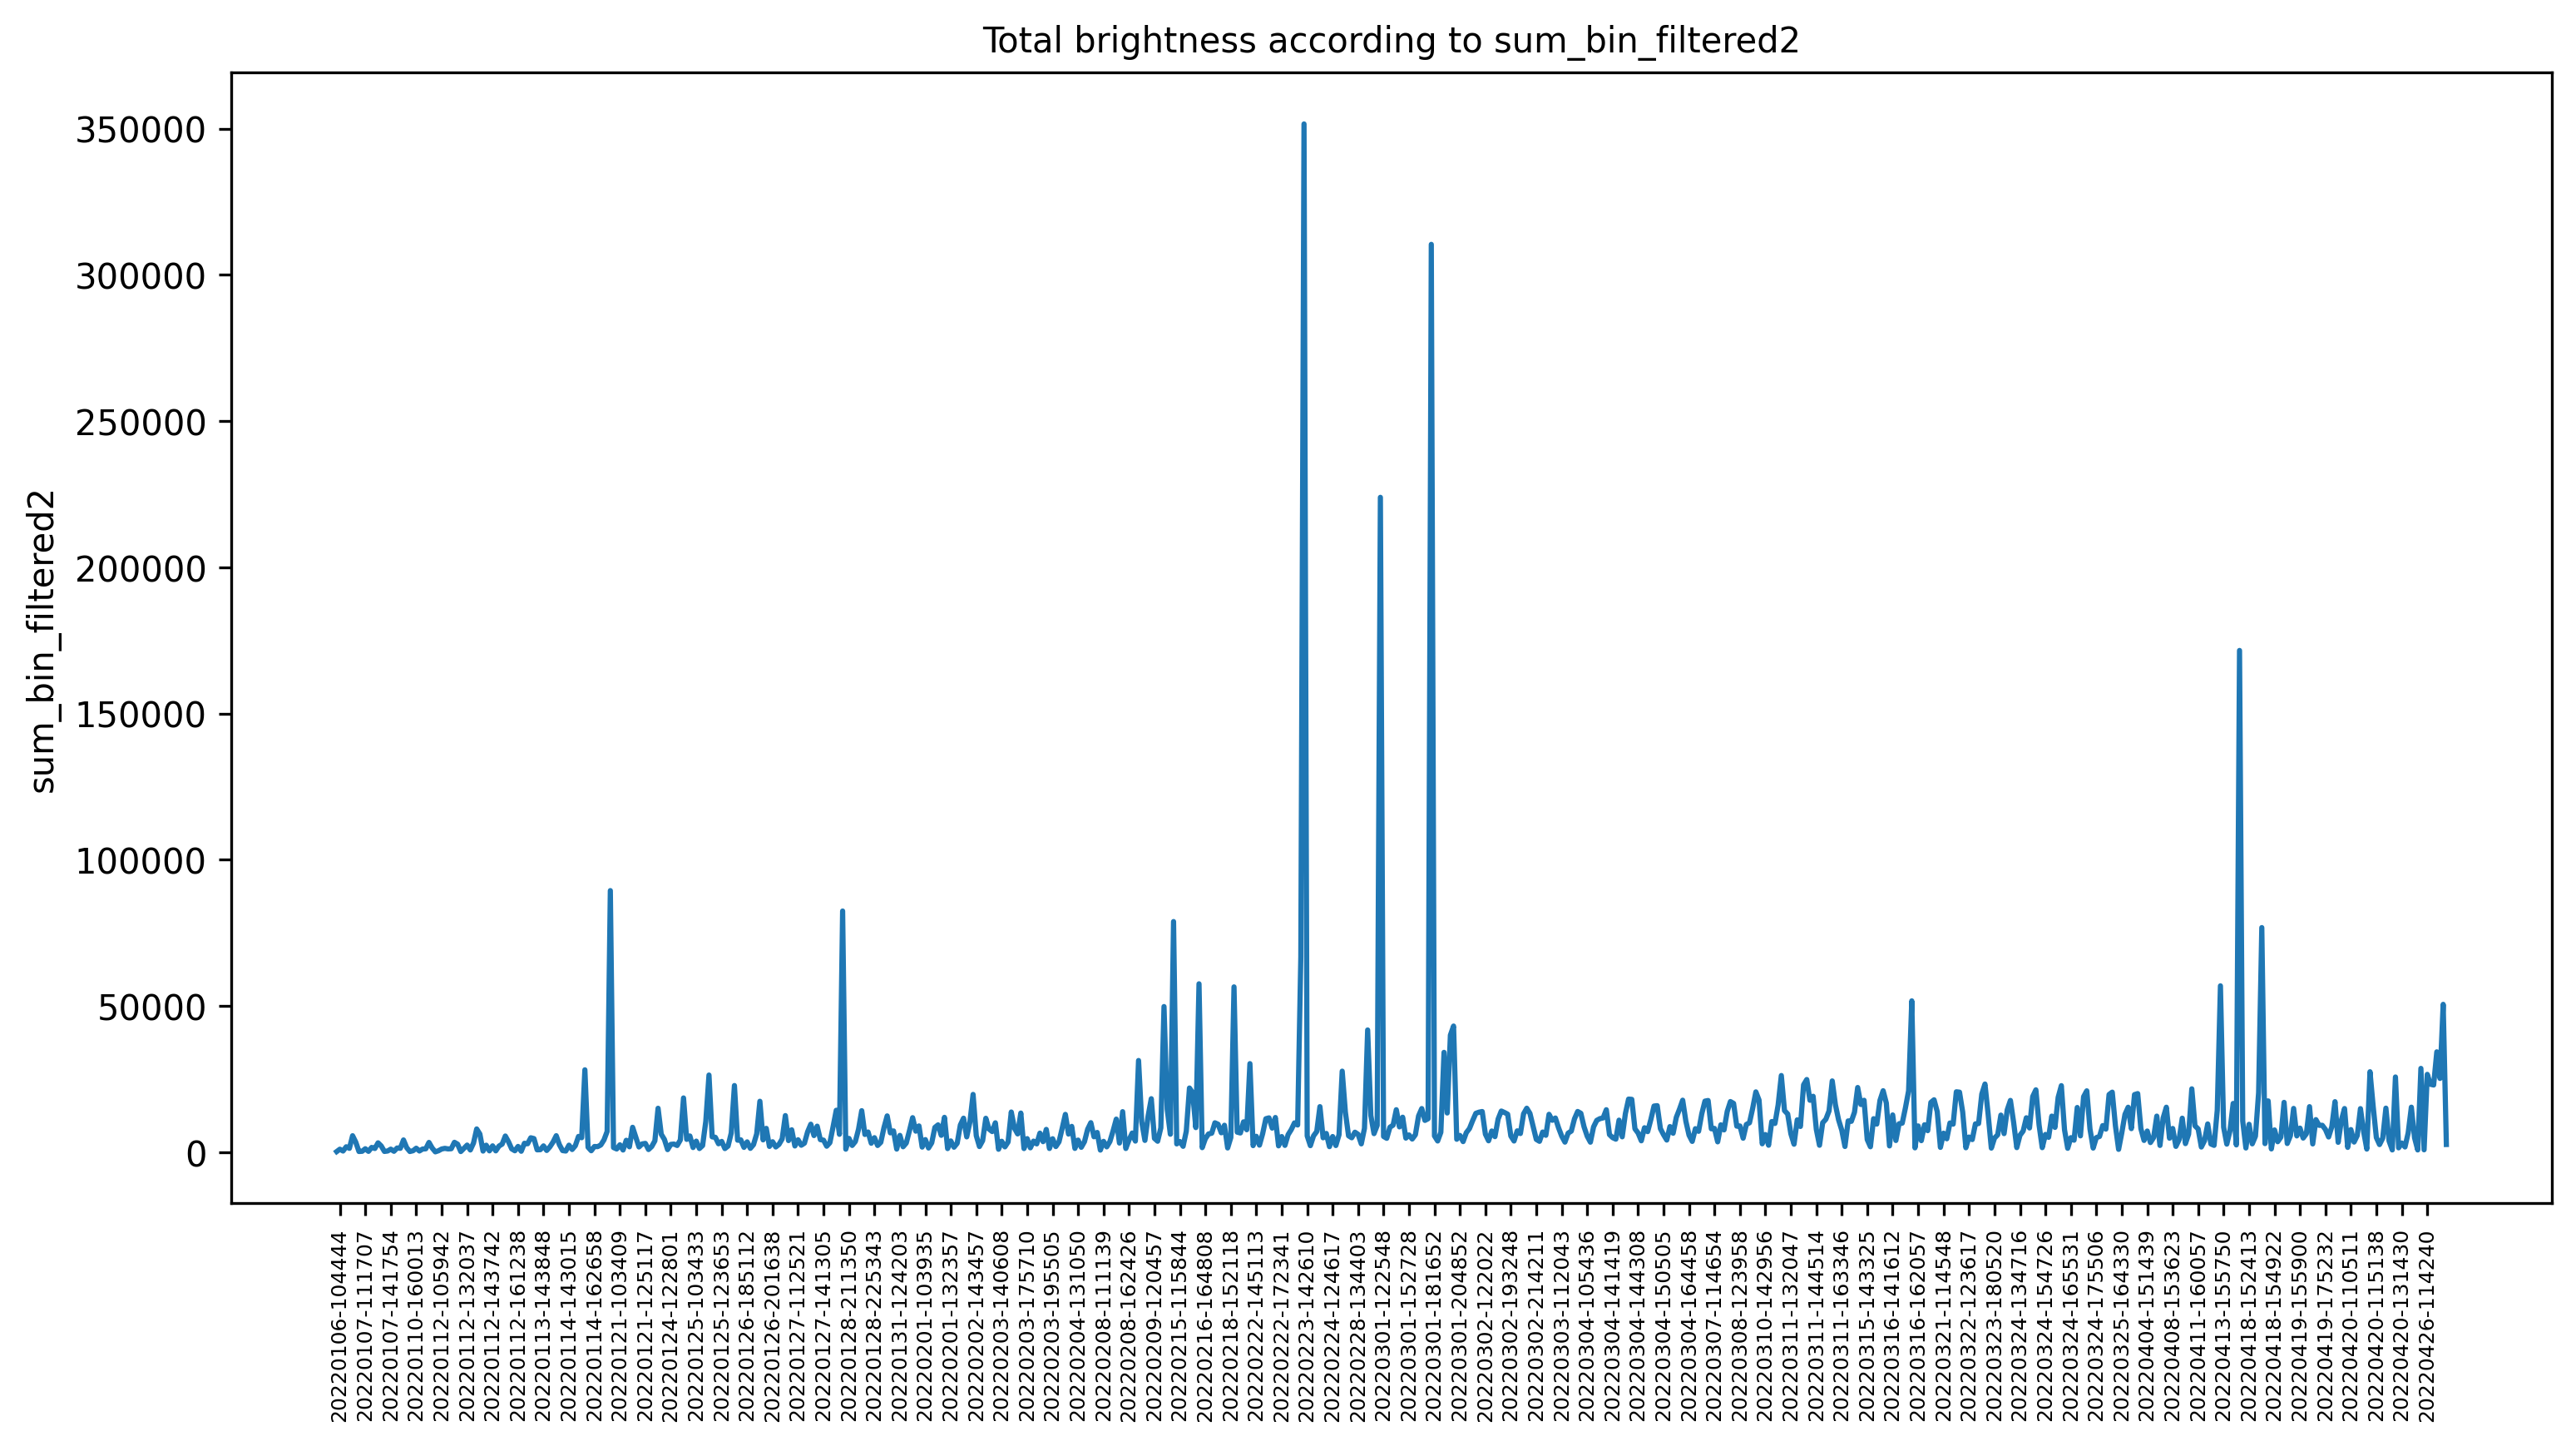

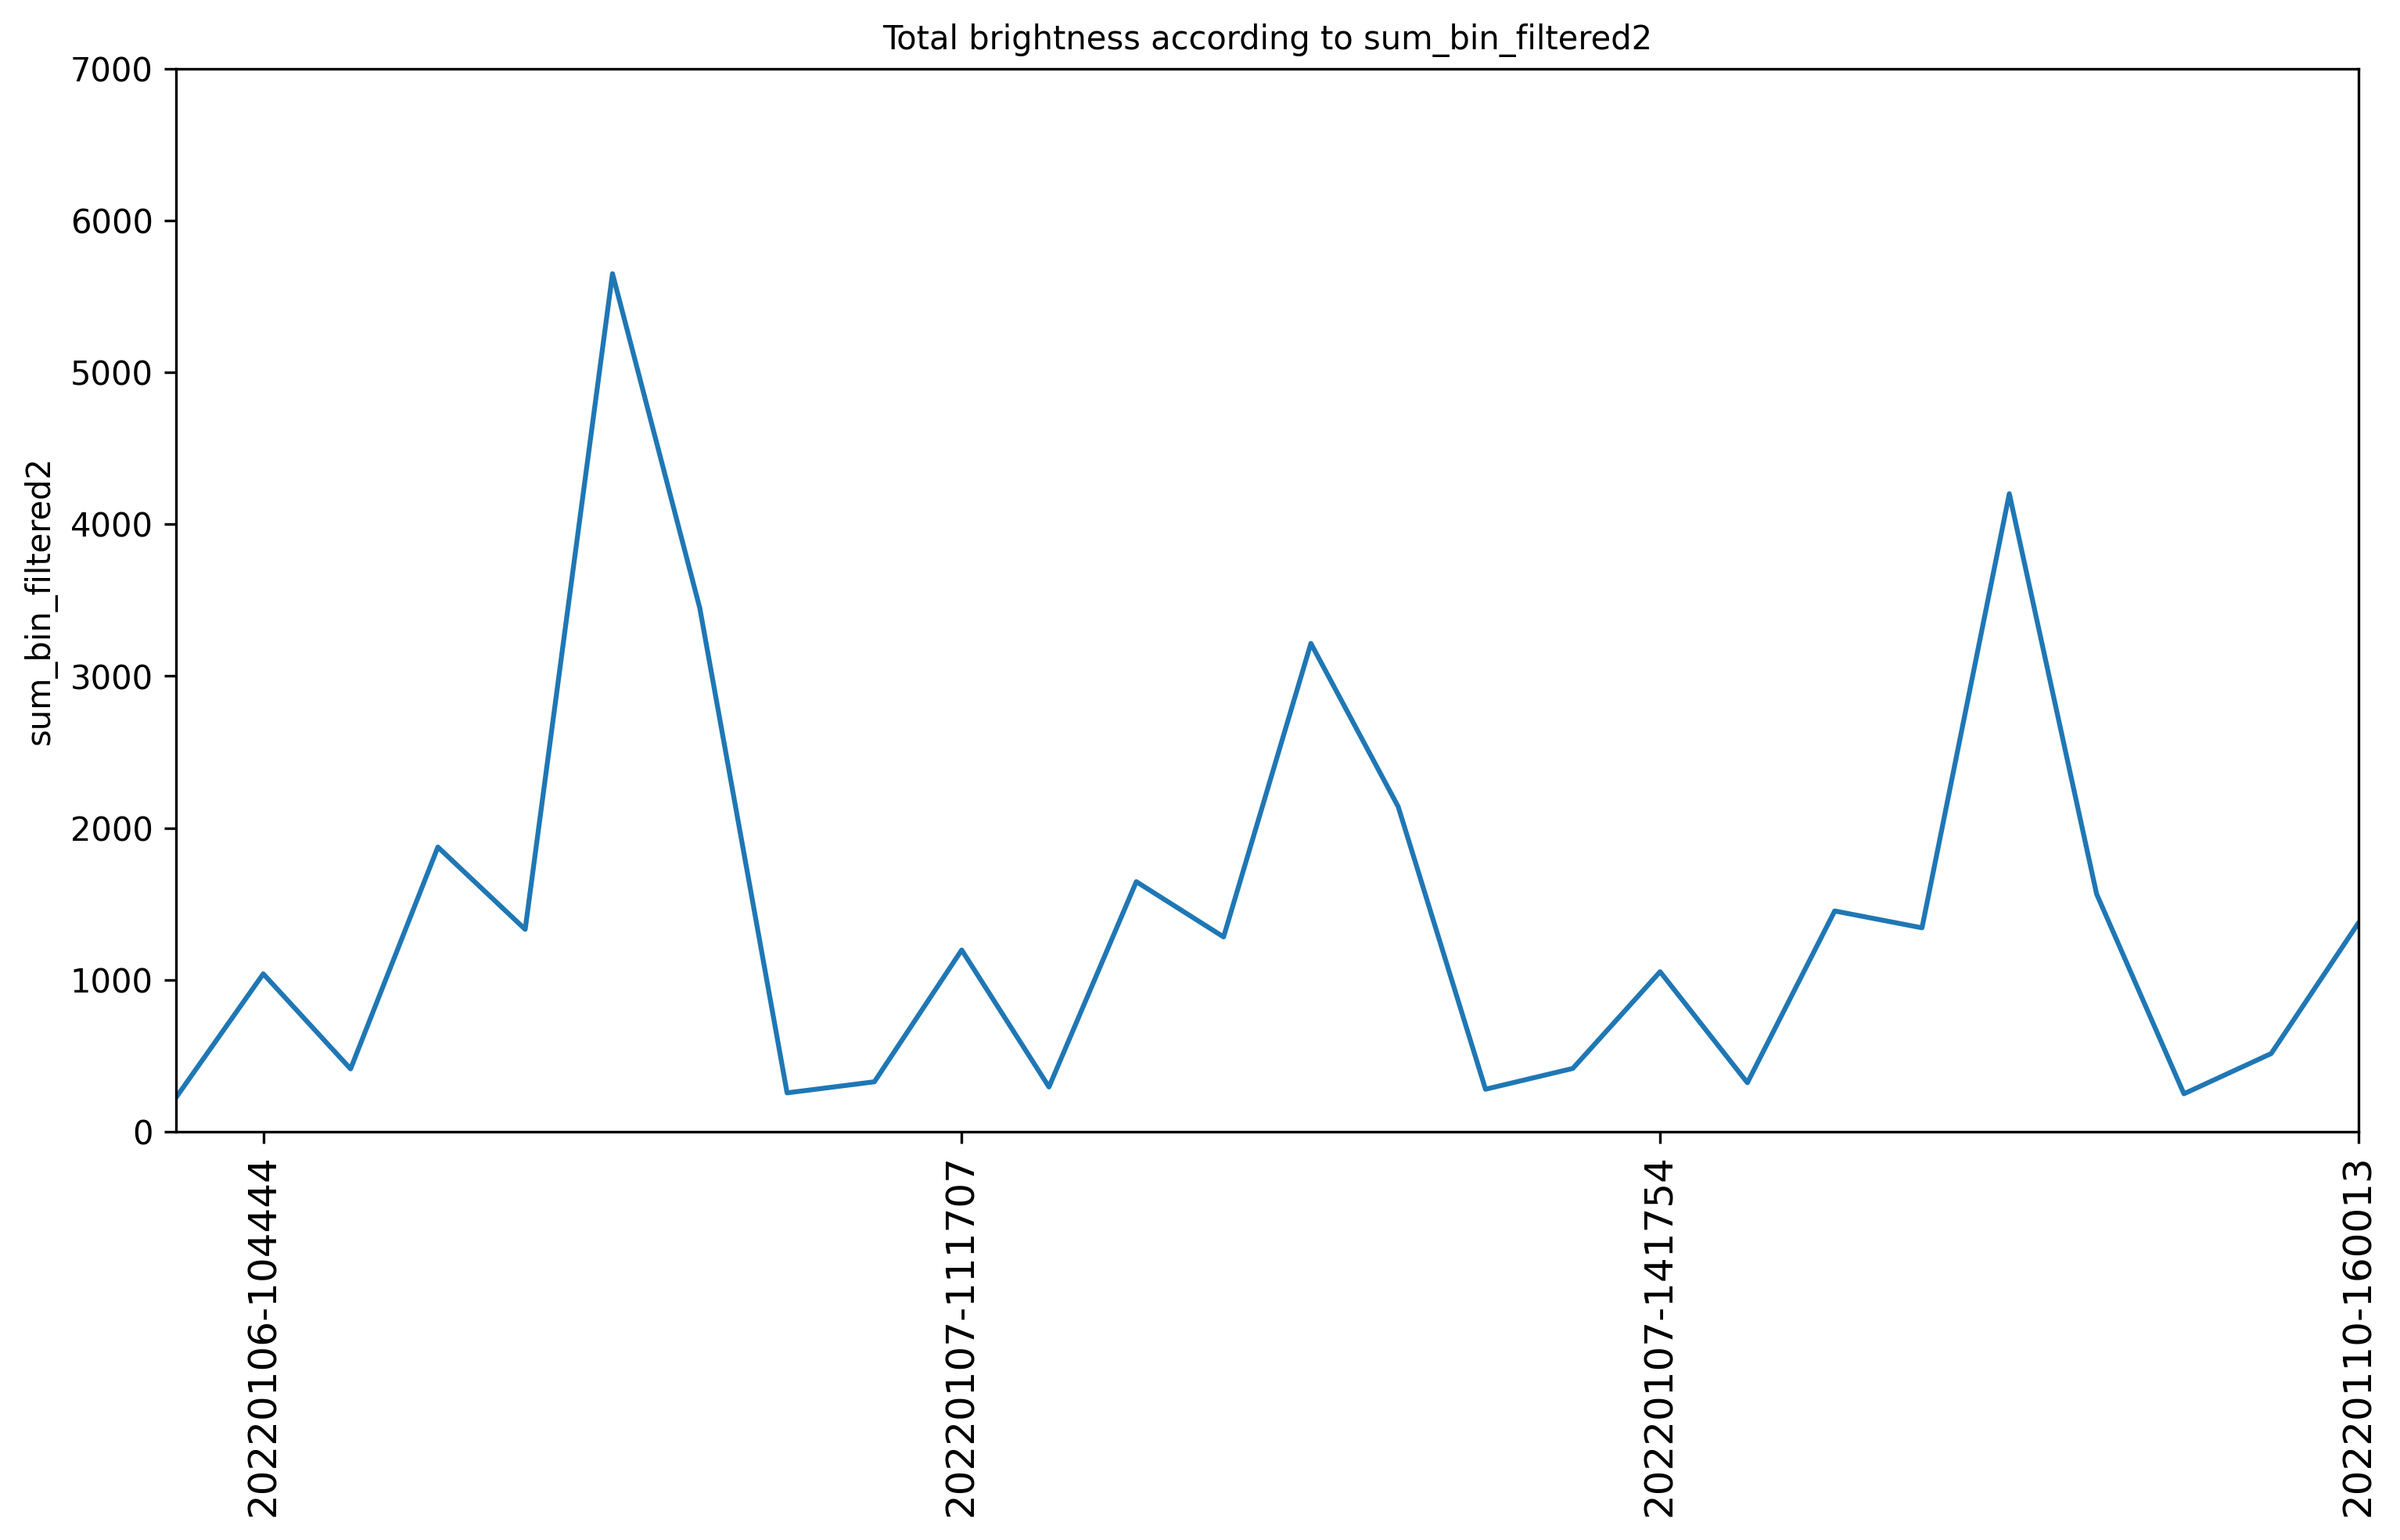

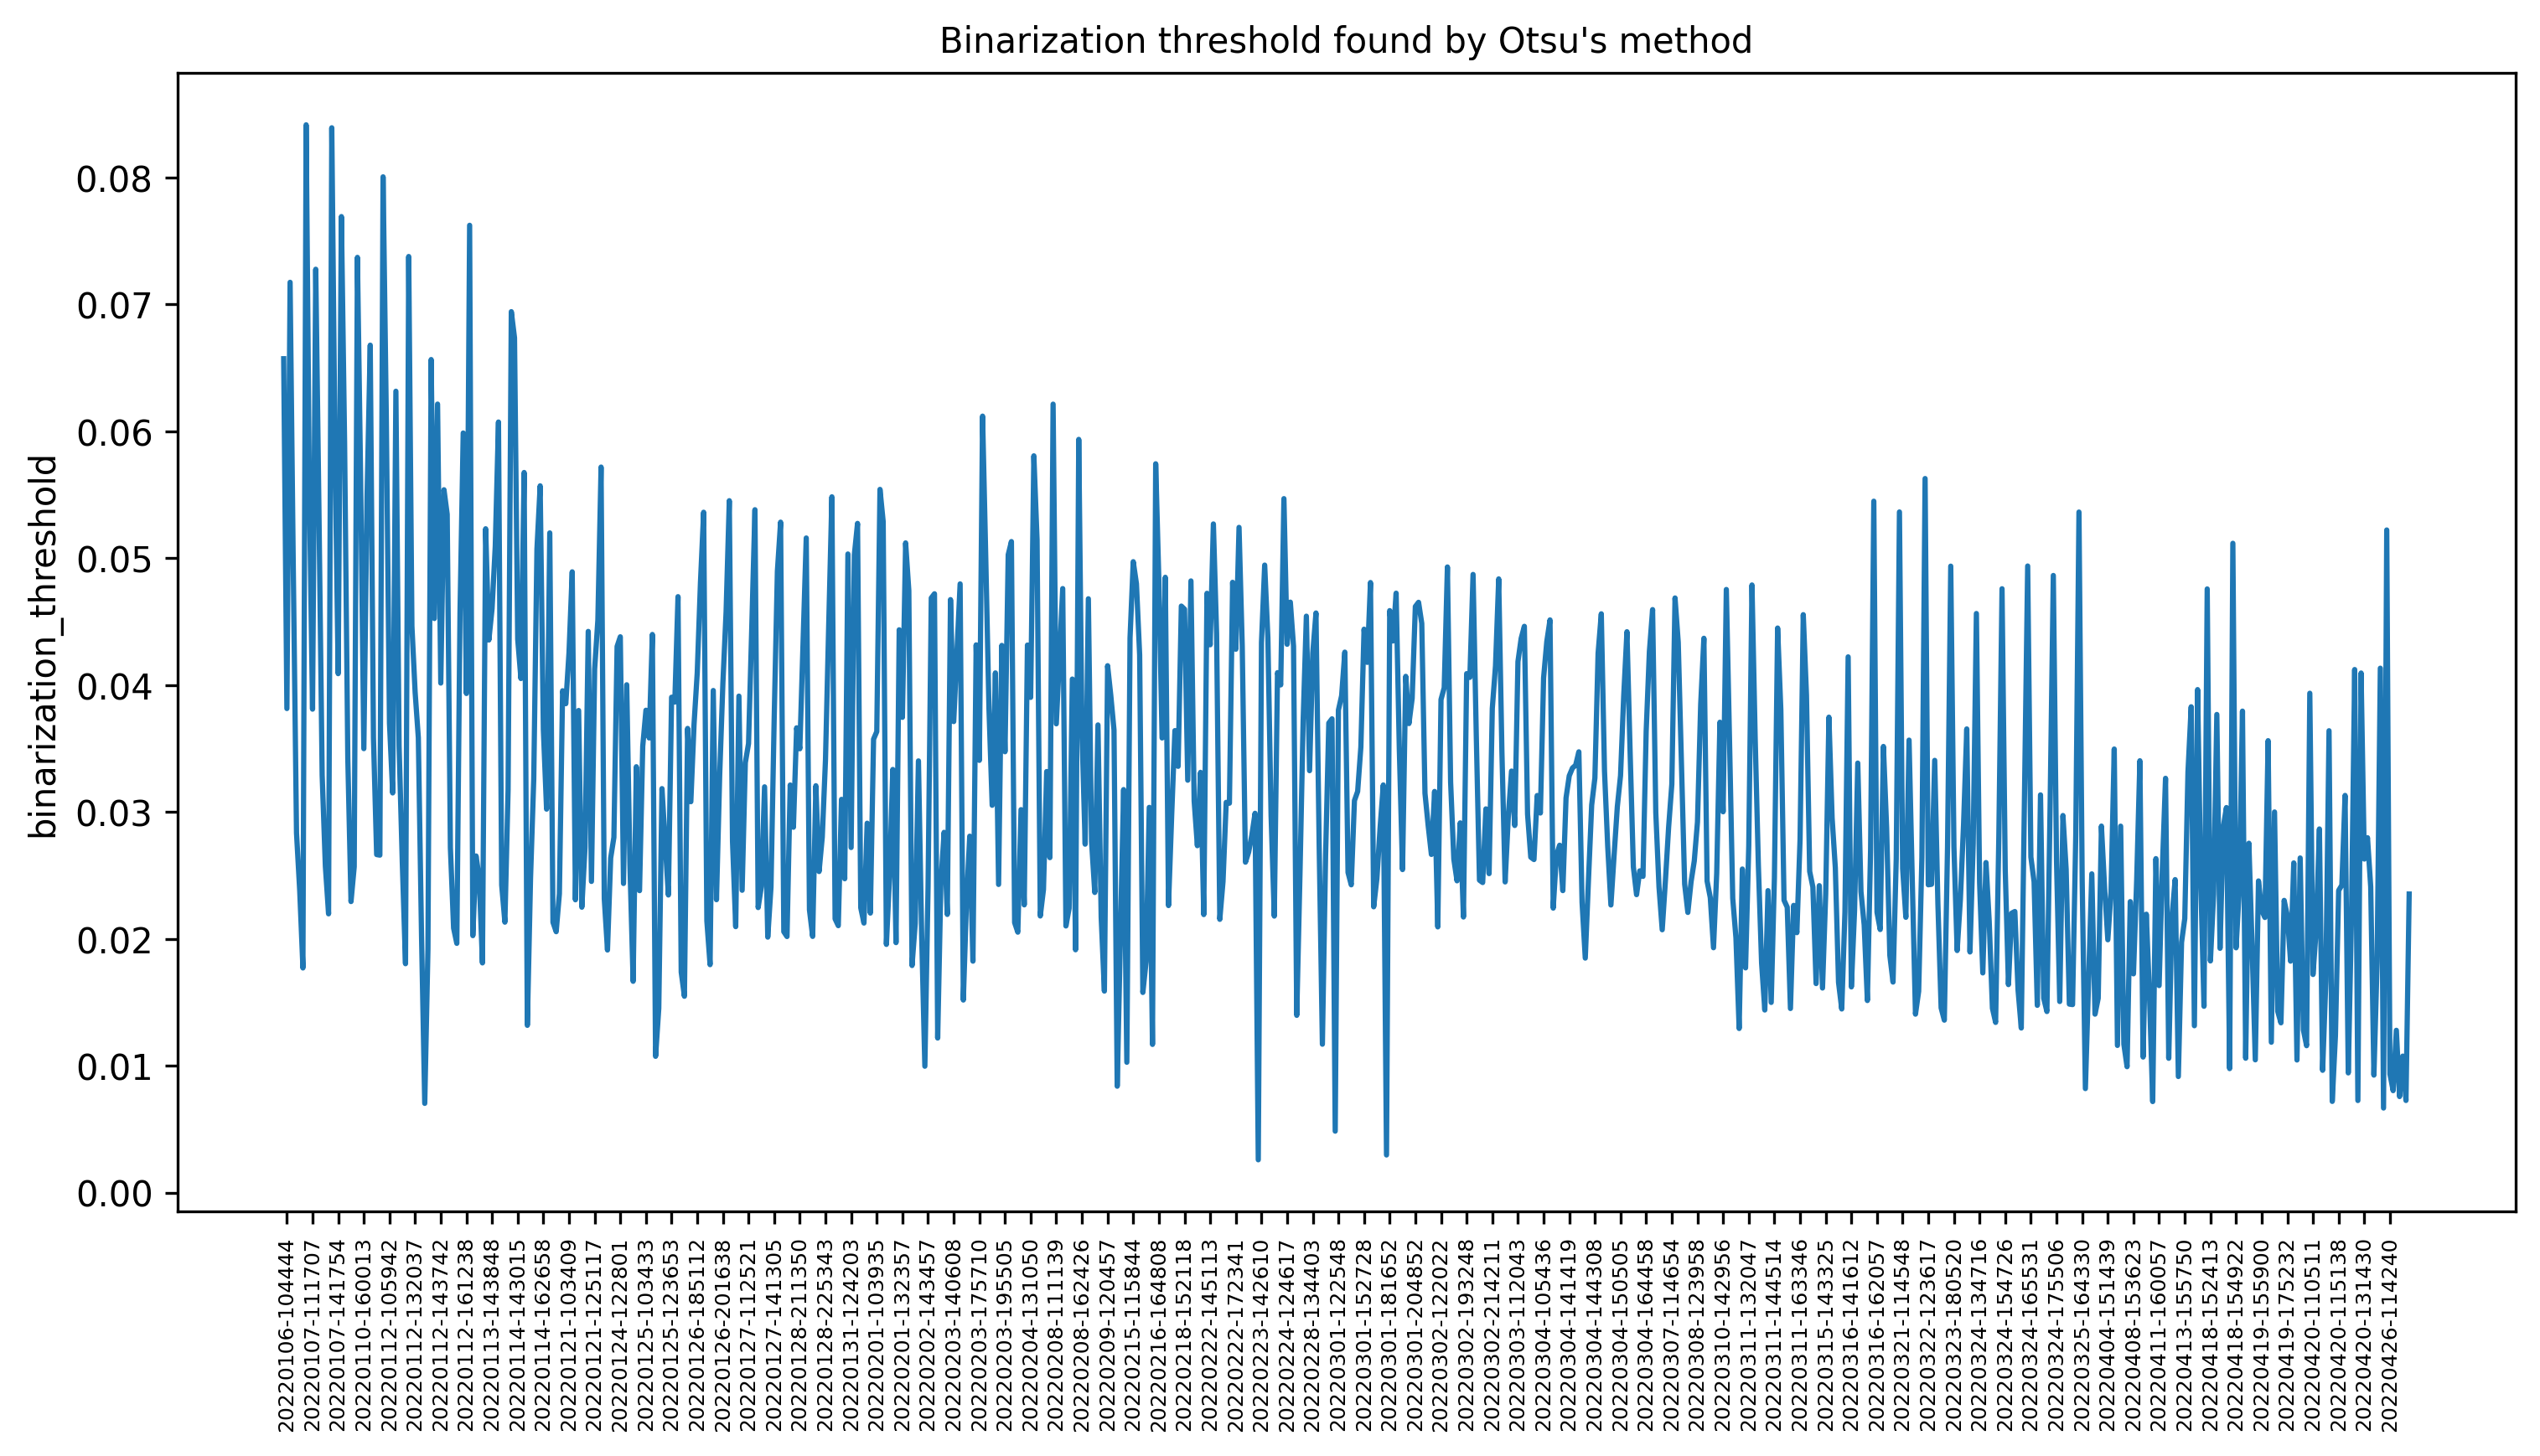

In [15]:
fs = 6
xticks = [8*i+1 for i in range(len(run_dirs))]

plt.figure(figsize=(12,6), dpi=300)
plt.plot(df_total['image_name'], df_total['sum_bin_filtered2'])
plt.xticks(xticks, run_dirs, rotation=90, fontsize=fs)
plt.ylabel('sum_bin_filtered2', fontsize=fs+4)
plt.title('Total brightness according to sum_bin_filtered2', fontsize=fs+4)
plt.show()

plt.figure(figsize=(12,6), dpi=300)
plt.plot(df_total['image_name'], df_total['sum_bin_filtered2'])
plt.xticks(xticks, run_dirs, rotation=90, fontsize=fs+6)
plt.xlim(0, 25)
plt.ylim(0, 7000)
plt.ylabel('sum_bin_filtered2', fontsize=fs+4)
plt.title('Total brightness according to sum_bin_filtered2', fontsize=fs+4)
plt.show()

plt.figure(figsize=(12,6), dpi=300)
plt.plot(df_total['image_name'], df_total['binarization_threshold'])
plt.xticks(xticks, run_dirs, rotation=90, fontsize=fs)
plt.ylabel('binarization_threshold', fontsize=fs+4)
plt.title('Binarization threshold found by Otsu\'s method', fontsize=fs+4)
plt.show()